 1. LOAD DATA & INITIAL EXPLORATION 
Success! Dataset loaded from: /kaggle/input/titanic/train.csv

 Data Snapshot (First 5 Rows) 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



- Dataset Shape -
Rows: 891, Columns: 12

 Data Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 Summary Statistics 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



 Duplicate Check 
Duplicate Rows: 0

 Missing Values Check 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 3. HANDLING MISSING VALUES & OUTLIERS 
Imputed 'Age' with median.
Imputed 'Embarked' with mode.
Dropped 'Cabin' column.
Fare outliers capped at: 65.63

 4. UNIVARIATE ANALYSIS 


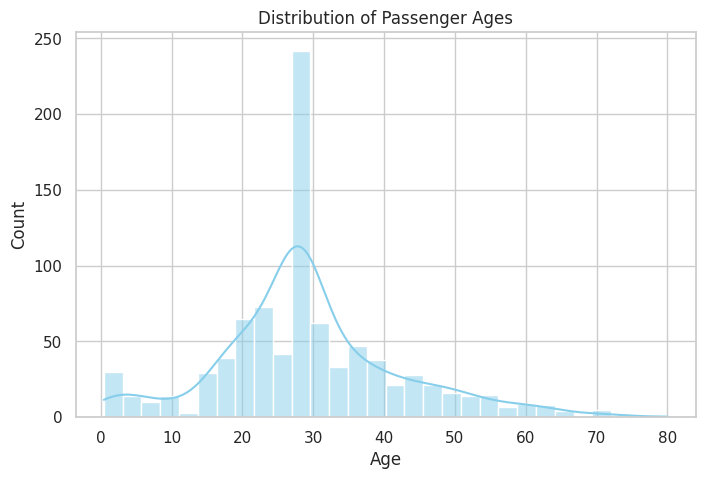

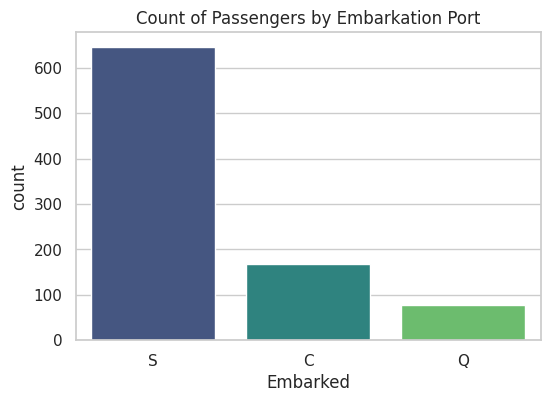

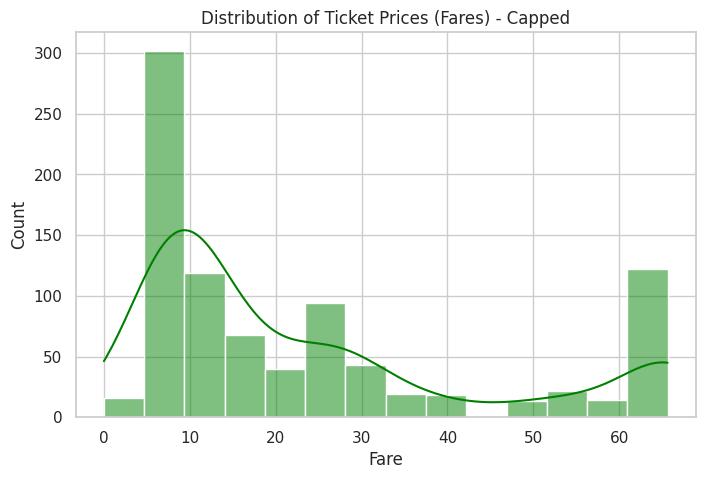


 5. TARGET VARIABLE EXPLORATION 


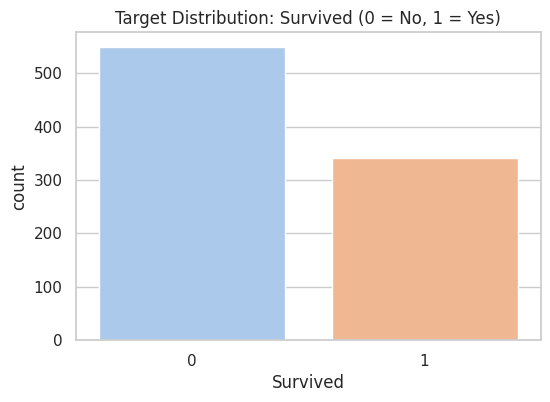

Survival Value Counts (%):
 Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

 6. BIVARIATE ANALYSIS 


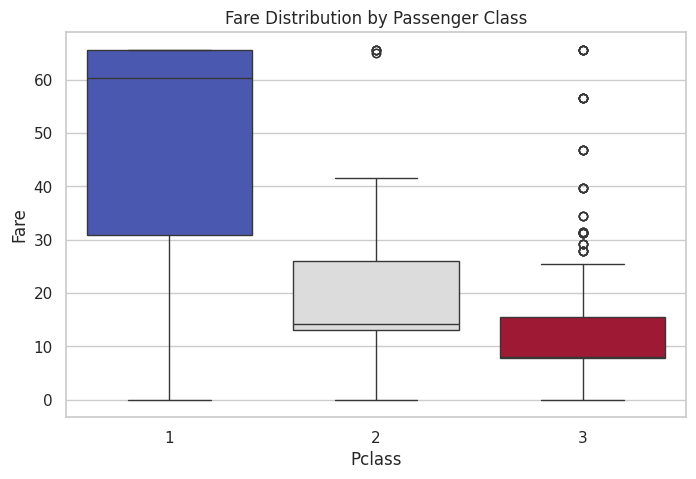

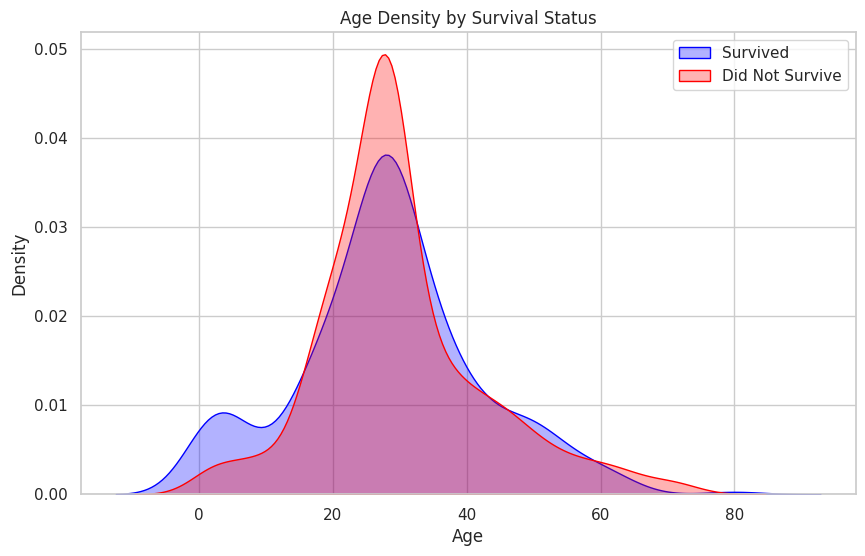

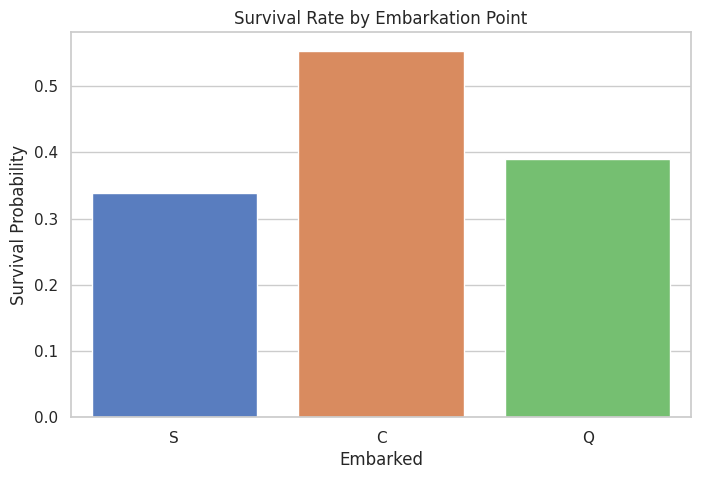


 7. MULTIVARIATE ANALYSIS 


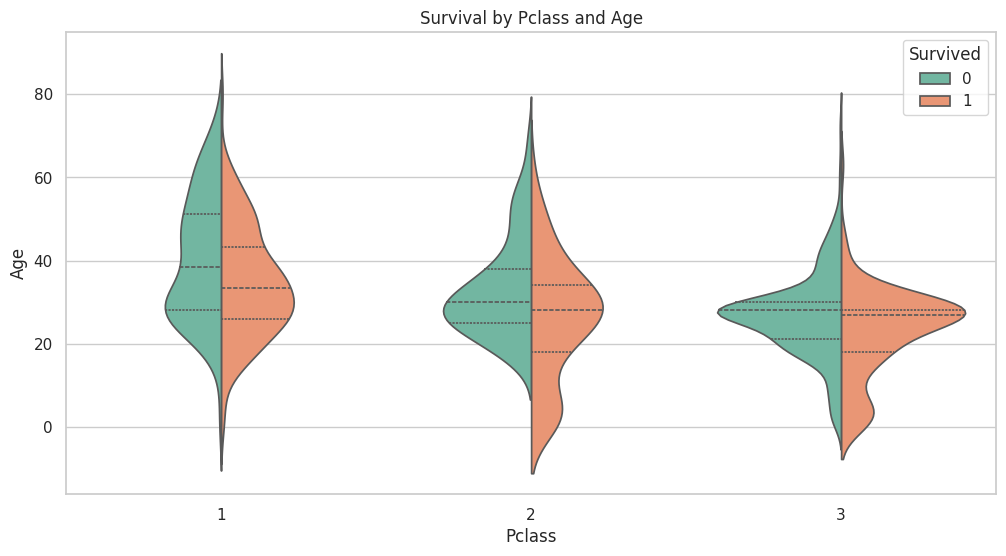

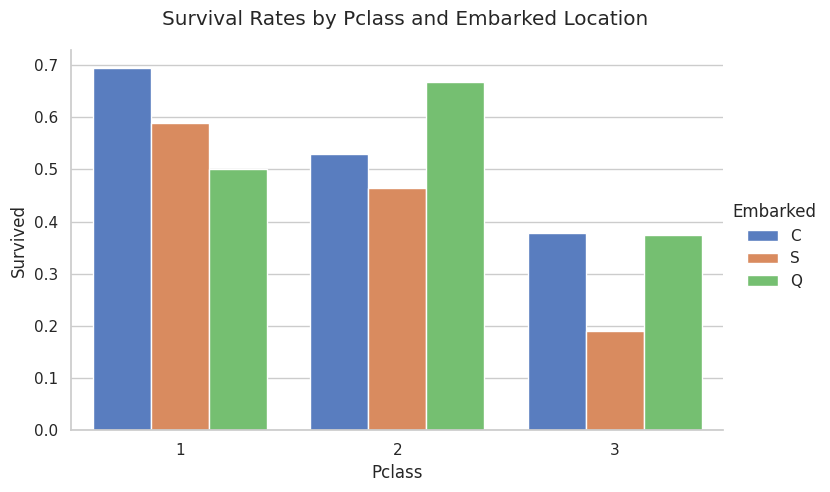

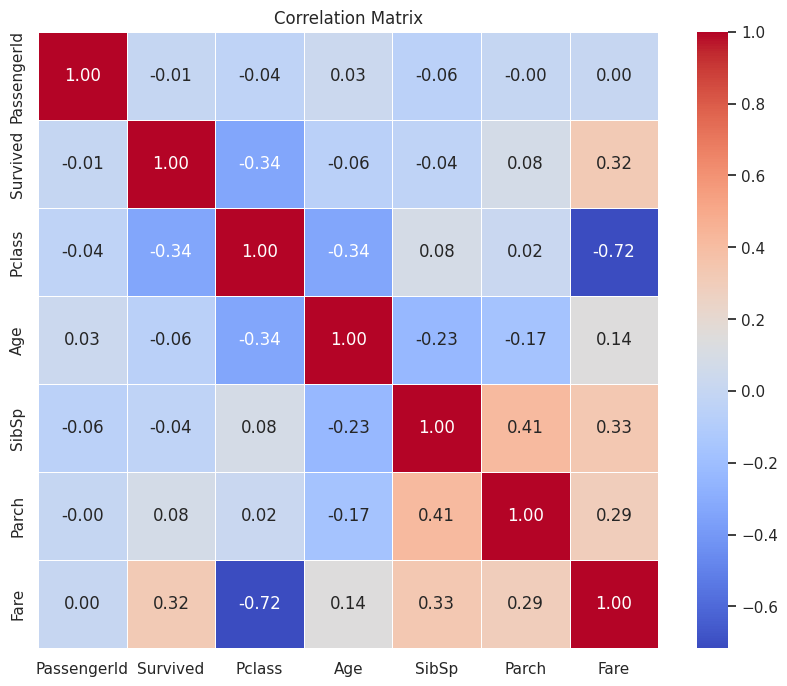


 Analysis Complete 


In [1]:
'''
  Title: Exploratory Data Analysis - Titanic Dataset
  Name: Rodney Roy Gitonga
  Cybershujaa ID :CS-DA03-26025
  Program:DA1-2026
  Date:29/01/2026
  Description: A comprehensive EDA on the Titanic dataset covering univariate, bivariate,
  and multivariate analysis to understand survival patterns as per assignment requirements.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style for better aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# 1. LOAD DATA AND iNITIAL EXPLORATION

print(" 1. LOAD DATA & INITIAL EXPLORATION ")

# List of common Kaggle file paths for the Titanic dataset
possible_paths = [
    '/kaggle/input/titanic/train.csv',
    '/kaggle/input/titanic-dataset/train.csv',
    '/kaggle/input/titanic-machine-learning-from-disaster/train.csv'
]

df = None
for path in possible_paths:
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"Success! Dataset loaded from: {path}")
        break

if df is None:
    print("\nCRITICAL ERROR: Could not find the Titanic dataset.")
    raise FileNotFoundError("Titanic dataset not found. Please add it via '+ Add Input'.")


# 2. INITIAL EXPLORATION

print("\n Data Snapshot (First 5 Rows) ")
display(df.head())

print(f"\n- Dataset Shape -\nRows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n Data Info ")
df.info()

print("\n Summary Statistics ")
display(df.describe())

print("\n Duplicate Check ")
print(f"Duplicate Rows: {df.duplicated().sum()}")

print("\n Missing Values Check ")
print(df.isnull().sum())


# 3. HANDLING MISSING VALUES & OUTLIERS

print("\n 3. HANDLING MISSING VALUES & OUTLIERS ")

# Impute Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())
print(f"Imputed 'Age' with median.")

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(f"Imputed 'Embarked' with mode.")

if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)
    print("Dropped 'Cabin' column.")

# Outlier Detection (Fare)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare'])
print(f"Fare outliers capped at: {upper_bound:.2f}")


# 4. UNIVARIATE ANALYSIS

print("\n 4. UNIVARIATE ANALYSIS ")

# A. Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.show()

# B. Embarked [FIXED WARNING 1]
plt.figure(figsize=(6, 4))
# Added hue='Embarked' and legend=False
sns.countplot(x='Embarked', data=df, hue='Embarked', legend=False, palette='viridis')
plt.title('Count of Passengers by Embarkation Port')
plt.show()

# C. Fare
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], kde=True, color='green')
plt.title('Distribution of Ticket Prices (Fares) - Capped')
plt.show()


# 5. TARGET VARIABLE ANALYSIS

print("\n 5. TARGET VARIABLE EXPLORATION ")

# [FIXED WARNING 2]
plt.figure(figsize=(6, 4))
# Added hue='Survived' and legend=False
sns.countplot(x='Survived', data=df, hue='Survived', legend=False, palette='pastel')
plt.title('Target Distribution: Survived (0 = No, 1 = Yes)')
plt.show()

print("Survival Value Counts (%):\n", df['Survived'].value_counts(normalize=True) * 100)


# 6. BIVARIATE ANALYSIS

print("\n 6. BIVARIATE ANALYSIS ")

# A. Fare vs Pclass [FIXED WARNING 3]
plt.figure(figsize=(8, 5))
# Added hue='Pclass' and legend=False
sns.boxplot(x='Pclass', y='Fare', data=df, hue='Pclass', legend=False, palette='coolwarm')
plt.title('Fare Distribution by Passenger Class')
plt.show()

# B. Age vs Survival
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'], fill=True, label='Survived', color='blue', alpha=0.3)
sns.kdeplot(df[df['Survived'] == 0]['Age'], fill=True, label='Did Not Survive', color='red', alpha=0.3)
plt.title('Age Density by Survival Status')
plt.legend()
plt.show()

# C. Embarked vs Survival [FIXED WARNING 4]
plt.figure(figsize=(8, 5))
# Added hue='Embarked' and legend=False
sns.barplot(x='Embarked', y='Survived', data=df, hue='Embarked', legend=False, palette='muted', errorbar=None)
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Probability')
plt.show()


# 7. MULTIVARIATE ANALYSIS

print("\n 7. MULTIVARIATE ANALYSIS ")

# A. Pclass, Age, Survival
plt.figure(figsize=(12, 6))
# This one was already fine because it had a hue
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, inner='quart', palette='Set2')
plt.title('Survival by Pclass and Age')
plt.show()

# B. Embarked, Pclass, Survival
# This one was already fine because it had a hue
g = sns.catplot(x="Pclass", y="Survived", hue="Embarked", kind="bar", data=df, height=5, aspect=1.5, palette='muted', errorbar=None)
g.fig.suptitle('Survival Rates by Pclass and Embarked Location')
plt.subplots_adjust(top=0.9)
plt.show()

# C. Correlation
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print("\n Analysis Complete ")